In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Prepare Data

In [3]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']


positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

## Define Functions

In [4]:
def strip_punctuation(string):
    for char in punctuation_chars:
        string = string.replace(char, '')
    return string

In [5]:
def get_pos(string):
    count = 0
    words = strip_punctuation(string).lower().split()
    for word in words:
        if word in positive_words:
            count += 1
    return count

def get_neg(string):
    count = 0
    words = strip_punctuation(string).lower().split()
    for word in words:
        if word in negative_words:
            count += 1
    return count

In [6]:
def process_tweet(tweet):
    tweet = tweet.strip().split(',')
    tweet_text = tweet[0]
    retweet_count = int(tweet[1])
    reply_count = int(tweet[2])
    positive_score = get_pos(tweet_text)
    negative_score = get_neg(tweet_text)
    net_score = positive_score - negative_score
    return f'{retweet_count}, {reply_count}, {positive_score}, {negative_score}, {net_score}'

In [7]:
def write_csv(resulting_data):
    with open("resulting_data.csv", "w") as outfile:
        outfile.write("Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n")
        outfile.write('\n'.join(resulting_data))
        outfile.write('\n')

## Analyze Data

In [8]:
resulting_data = []
with open("project_twitter_data.csv", "r") as f:
    for row in f: 
        if 'tweet_text,retweet_count,reply_count' in row: #skip first line - hard coded sorry :)
            continue
        resulting_data.append(process_tweet(row))

write_csv(resulting_data)

# Net Score vs Number of Retweets Graph

In [9]:
data = pd.read_csv("resulting_data.csv")
data

,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,2,2,0
2,1,2,1,0,1
3,3,1,1,0,1
4,6,0,2,0,2
5,9,5,2,0,2
6,19,0,2,0,2
7,0,0,0,3,-3
8,0,0,0,2,-2
9,82,2,4,0,4


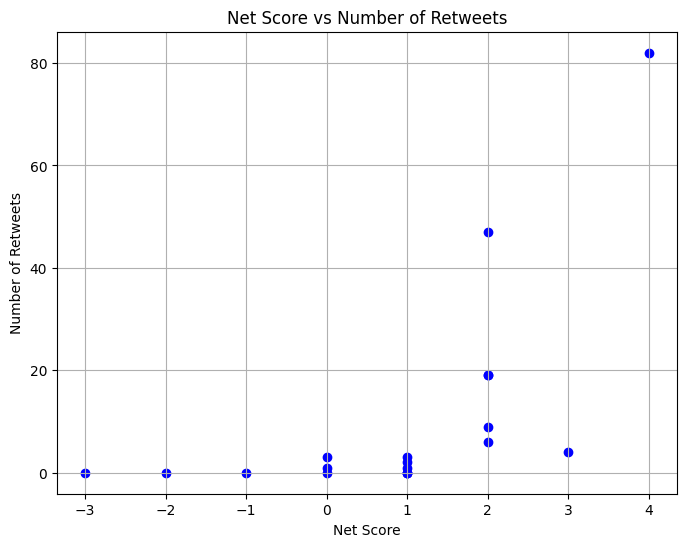

In [10]:
retweets = data["Number of Retweets"]
net_scores = data[" Net Score"]

plt.figure(figsize=(8, 6))
plt.scatter(net_scores, retweets,color='b')
plt.ylabel("Number of Retweets")
plt.xlabel("Net Score")
plt.title("Net Score vs Number of Retweets")
plt.grid(True)
plt.show()